In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Central limit theorem
### The mean follows a normal distribution.

The sample mean is an **estimate** of the population mean.

Because the sample is random, the sample mean follows a distribution.

The **mean** of this distribution is the same as the population mean (unbiased estimate).

The **standard deviation** of this distribution is the population standard deviation over the square root of the sample size, also known as the **standard error of the mean**.

$sem = \frac{\sigma}{\sqrt{n}}$

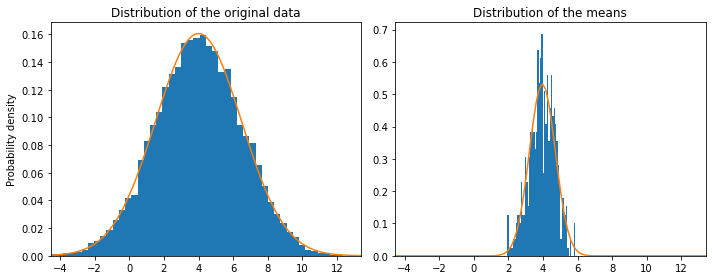

In [2]:
mu = 4
sigma = 2.5
s = 10000 # Population size.

x = stats.norm.rvs(mu, sigma, size=s)
x = x - np.mean(x) + mu # Fake mean stabilization for the example.

n = 10 # Sample size.
x_ = sorted(np.mean(np.random.choice(x, n)) for i in range(500)) # Sample of the means.

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(x, bins = 50, density=True)
ax[1].hist(x_, bins = 50, density=True)

# Make the plots nicer.
window = 3
z = np.linspace(min(x), max(x), 100)
ax[0].plot(z, stats.norm.pdf(z, np.mean(x), np.std(x)))
ax[1].plot(z, stats.norm.pdf(z, np.mean(x_), np.std(x_)))
ax[0].set_xlim(min(x), max(x))
ax[1].set_xlim(min(x), max(x))
ax[0].set_title('Distribution of the original data')
ax[0].set_ylabel('Probability density')
ax[1].set_title('Distribution of the means')

plt.tight_layout()
plt.show()

### Z values are just the units of a standard normal distribution.

In [3]:
# 95% confidence intervals of a standard normal.
stats.norm.interval(0.95, loc=0, scale=1)

(-1.959963984540054, 1.959963984540054)

In [4]:
# 95% confidence intervals of the example distribution.
print(np.array(stats.norm.interval(0.95, loc=0, scale=1)) * np.std(x) + np.mean(x))
print(stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x)))

[-0.86769044  8.86769044]
(-0.8676904396421685, 8.867690439642168)


In [5]:
# 95% confidence intervals of the sample mean.
print(stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x) / np.sqrt(n)))
print(stats.norm.interval(0.95, loc=np.mean(x_), scale=np.std(x_)))

(2.4607011266104375, 5.539298873389562)
(2.4972439628618344, 5.4395028574696696)


### The standard deviation of a sample is an estimate of the population standard deviation.

In [6]:
# In practice.
my_sample = np.random.choice(x, n) # One sample.
print(np.mean(my_sample))
print(np.std(my_sample, ddof=1))
stats.norm.interval(0.95, loc=np.mean(my_sample), scale=np.std(my_sample, ddof=1) / np.sqrt(n))

3.892496126366074
3.0353213281774334


(2.011219045713617, 5.773773207018531)

In [7]:
# NumPy vs SciPy. 
print(np.std(my_sample, ddof=1) / np.sqrt(n))
print(stats.sem(my_sample))

0.9598528827528111
0.9598528827528111


In [8]:
# Probability of getting a value in a range.
print(stats.norm.cdf([-1.96, 1.96], loc=0, scale=1))
print(stats.norm.cdf([- 2 / np.std(x), 2 / np.std(x)], loc=0, scale=1))
print(stats.norm.cdf([np.mean(x) - 2, np.mean(x) + 2], loc=np.mean(x), scale=np.std(x)))

[0.0249979 0.9750021]
[0.21032466 0.78967534]
[0.21032466 0.78967534]


In [9]:
# Probability that the sample mean is within a range.
stats.norm.cdf([np.mean(my_sample) - 1, np.mean(my_sample) + 1],
               loc=np.mean(my_sample), scale=np.std(my_sample, ddof=1) / np.sqrt(n))

array([0.1487461, 0.8512539])

# Determining the sample size
We always start from a reasonable guess of, preferably, from the results of a pilot study.

In [10]:
def min_sample_size(distance, confidence, std):
    import scipy.stats
    z = scipy.stats.norm.interval(confidence)[1]
    
    n = (z * std / distance)**2
    
    return n

# Video example.
min_sample_size(15, 0.95, 180)

553.170070179954

In [11]:
# Q4.
p = 0.35

var = p * (1 - p)
std = np.sqrt(var)

std = stats.bernoulli(p).std()

min_sample_size(0.03, 0.95, std)

971.0354241199038

In [12]:
# Probability of getting a value in a range.
print(stats.norm.cdf([p - 0.03, p + 0.03], loc=p, scale=std / np.sqrt(971)))

[0.02500209 0.97499791]


In [13]:
# The other video example.
p = 0.5
std = stats.bernoulli(p).std()

confidence = 0.95

print(min_sample_size(0.02, 0.95, std))
print(min_sample_size(0.01, 0.95, std))

# Giving a confidence interval as mean +/- tolerance.
l, u = stats.norm.interval(confidence, loc=p, scale=p / np.sqrt(9603))
print('The mean is %.1f +/- %.2f with %.0f%% confidence.' % (p, (u - l) / 2, confidence * 100))

2400.911762933828
9603.647051735312
The mean is 0.5 +/- 0.01 with 95% confidence.


In [14]:
# A note on percentages.
percentage = 8.3

# Video example.
print(min_sample_size(percentage, 0.95, 180)) # Wrong.
print(min_sample_size(percentage / 100 * 180, 0.95, 180)) # Correct.

1806.6956857379832
557.6221252277726
